### №1 Section for importing libraries and reading data

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

colors = ['b', 'g', 'r']
markers = ['s', '*', 'o']
work_dir_path = os.path.join(os.getcwd(), 'bin_data')
spectra_path = os.path.join(work_dir_path, 'data.npy')
labels_path = os.path.join(work_dir_path, 'labels.npy')
spectra = np.load(spectra_path)
labels = np.load(labels_path)

### №2 Section for visualizing input data

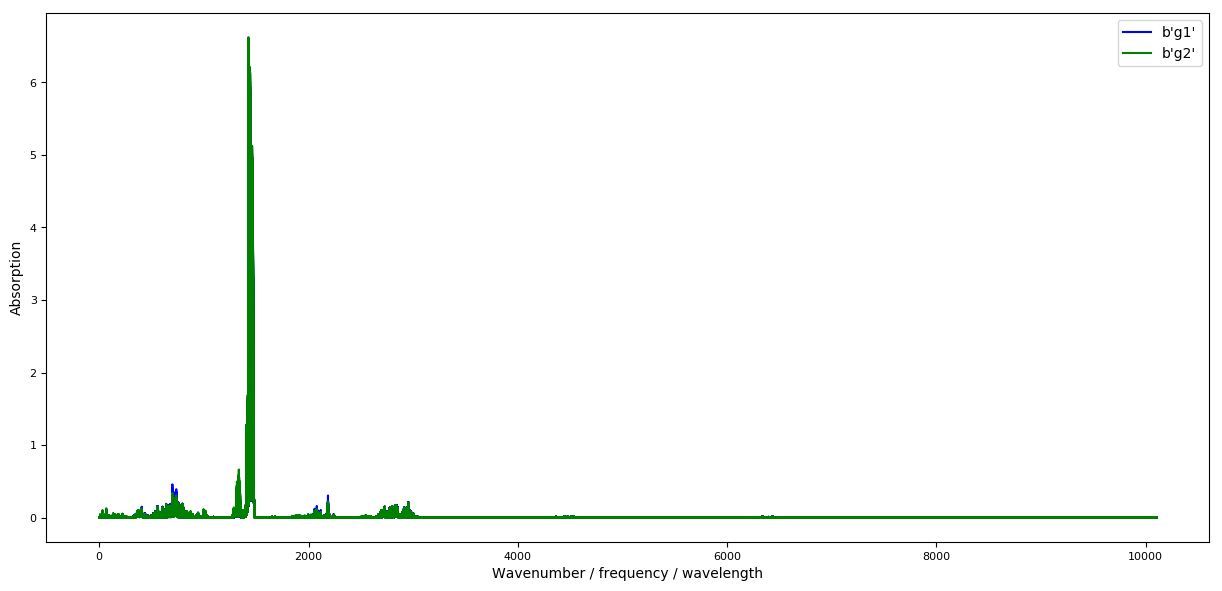

In [22]:
def plot_spectra(spectra, labels):
    unique_labels = np.unique(labels)

    fig = plt.figure(figsize=(15, 7), dpi=100)
    plt.ylabel('Absorption', fontsize=10)
    plt.xlabel('Wavenumber / frequency / wavelength', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    c = 1
    for label in unique_labels:
        label_indices = (labels[:] == label)
        label_spectra = spectra[label_indices]
        
        for spectrum in label_spectra:
            plt.plot(range(0, len(spectrum)), spectrum, color=colors[len(colors) % c], label=label)
        c += 1

    legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
    handle_by_label = dict(zip(legend_labels, legend_handles))
    plt.legend(handle_by_label.values(), handle_by_label.keys()) 
    plt.show()

    return

plot_spectra(spectra, labels)

### №3 Section for calculating PCA and displaying explained variance

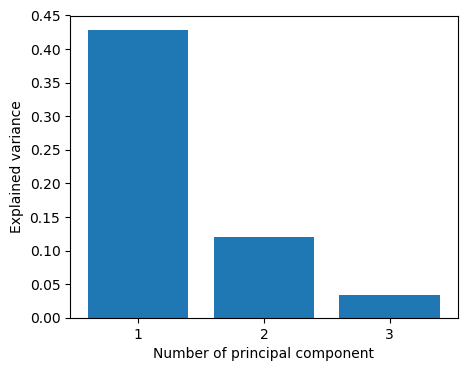

In [23]:
n_components = 3

pca = PCA(n_components=n_components)
pca.fit(spectra)
pca_result = pca.fit_transform(spectra)

fig = plt.figure(figsize=(5, 4), dpi=100)
plt.bar(range(1,n_components + 1) ,pca.explained_variance_)
plt.grid(False)
plt.xticks(range(1, n_components + 1))
plt.xlabel('Number of principal component')
plt.ylabel('Explained variance')
plt.show()

### №4 Section for displaying PCA results as a scatter plot

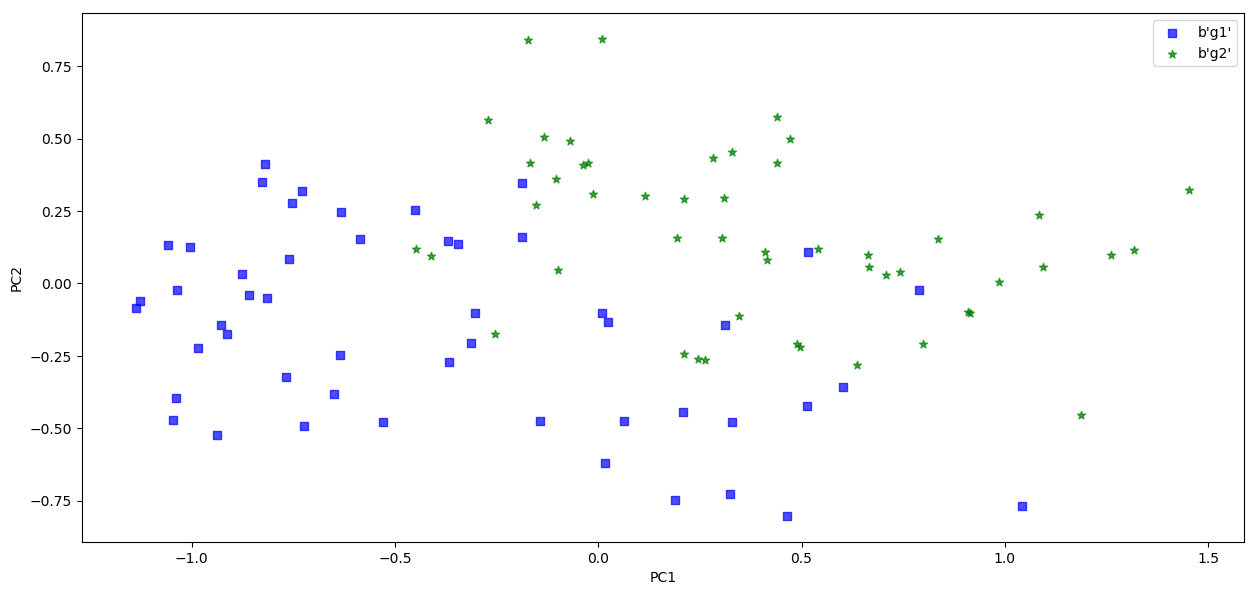

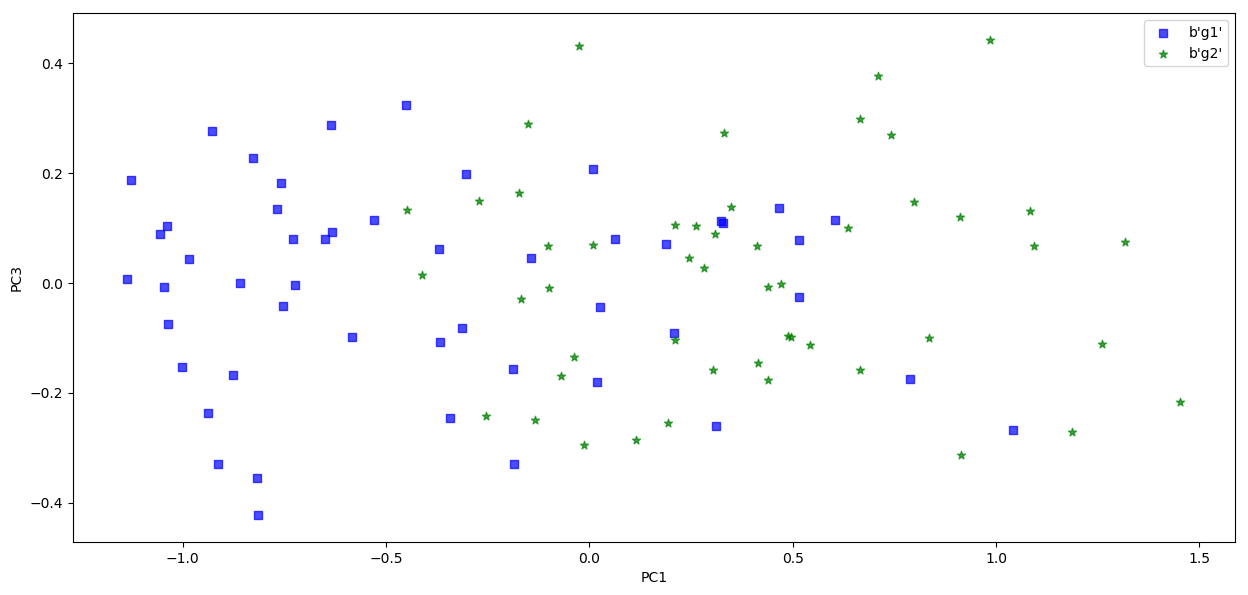

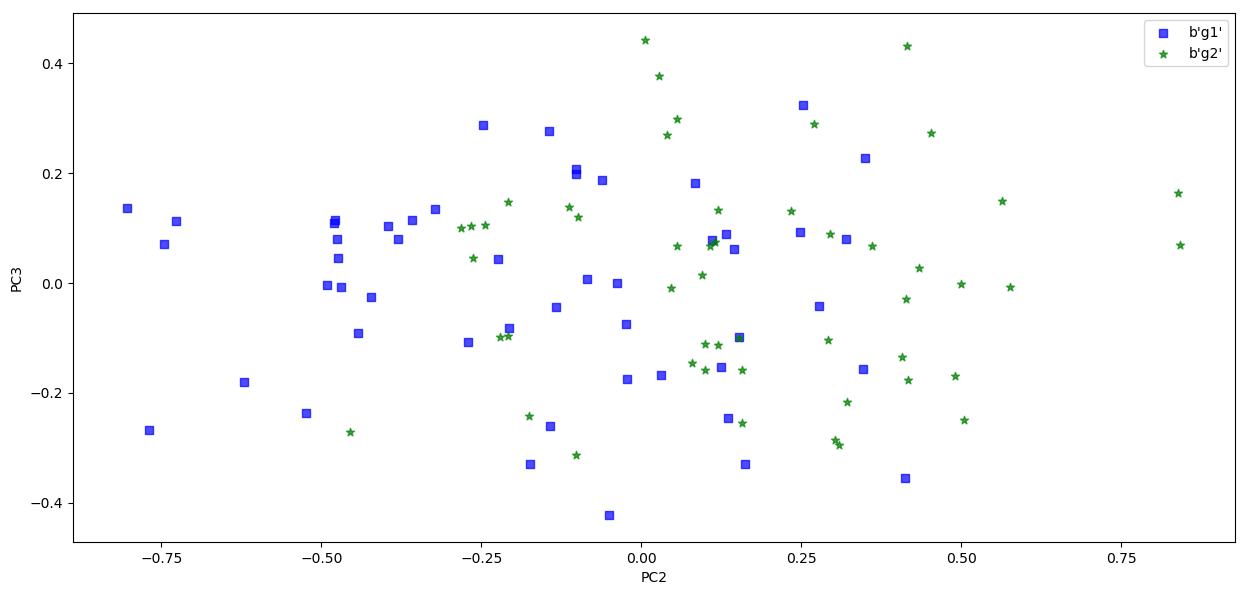

In [24]:
unique_labels = np.unique(labels)
for i in range(0, n_components):
    for j in range(i+1, n_components):
        fig = plt.figure(figsize=(15, 7), dpi=100)
        plt.grid(False)
        plt.xlabel('PC' + str(i+1))
        plt.ylabel('PC' + str(j+1))
        
        c = 1
        for label in unique_labels:
            label_indices = (labels[:] == label)
            label_pc = pca_result[label_indices]
            plt.scatter(label_pc[:, i], label_pc[:, j], alpha=0.7, c=colors[len(colors) % c], marker=markers[len(markers) % c], label=label)
            c += 1

        plt.legend()
        plt.show()